# Projectile motion

*This is the next evolutionary step. It allows user interaction without directly editing code. The code is reorganized to facilitate this interactivity.*

## The question
We are trying to throw an object as far as possible. What is the optimal angle?

## The process


1. Decide on a model.
1. Implement it.
1. Run the simulation, collect data.
1. Visualize the data for evaluation.
1. Possibly change parameters (promising angles) and repeat the process.
1. Decide on a (reasonably precise) result.
1. Write a conclusion.

## The model

We do not want to simulate the whole universe, so we make some assumptions. Our work will become much easier, without distorting the results and conclusions too much.

* We assume we are on Earth.
 * Gravitational pull is constant.
 * Our throw is negligible in comparison to the diameter of the planet.
* The object we throw is a mass point: no size, so no balance, no rotation, no friction...

We describe the position of the point using carthesian coordinates.
The point moves according to the horizontal and vertical components of its velocity. The vertical velocity is changed by gravity.


## The simulation



Set the basic parameters:

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np

Parameters = {}
Parameters["G"] = widgets.FloatSlider(description="Gravity", value=-9.81, step=0.01,  min=-25, max=25)
Parameters["y_0"] = widgets.FloatSlider(description="Initial height", value=0, step=1,  min=0, max=1000)
Parameters["v_0"] = widgets.FloatSlider(description="Initial velocity", value=10, step=0.1,  min=0, max=100)
Parameters["dt"] = widgets.FloatSlider(description="Time step", value=.1, step=0.01,  min=0.01, max=10)
Parameters["Angle_min"] = widgets.FloatSlider(description="Min. angle", value=10, step=.1,  min=0, max=89)
Parameters["Angle_max"] = widgets.FloatSlider(description="Max. angle", value=80, step=.1,  min=1, max=90)
Parameters["Angle_num"] = widgets.IntSlider(description="# of trials", value=10, step=1,  min=1, max=90)

for Param in Parameters.values() :
  display(Param)

FloatSlider(value=-9.81, description='Gravity', max=25.0, min=-25.0, step=0.01)

FloatSlider(value=0.0, description='Initial height', max=1000.0, step=1.0)

FloatSlider(value=10.0, description='Initial velocity')

FloatSlider(value=0.1, description='Time step', max=10.0, min=0.01, step=0.01)

FloatSlider(value=10.0, description='Min. angle', max=89.0)

FloatSlider(value=80.0, description='Max. angle', max=90.0, min=1.0)

IntSlider(value=10, description='# of trials', max=90, min=1)

Now run the simulation.

In [ ]:
import math

def sim(angle_degrees):
    x = 0
    y = Parameters["y_0"].value
    angle = math.radians(angle_degrees)  # Convert angle from degrees to radians
    v_x = Parameters["v_0"].value * math.cos(angle)  # Horizontal velocity
    v_y = Parameters["v_0"].value * math.cos(math.pi/2 - angle)  # Vertical velocity
    trajectory_x = []  # Lists to store positions
    trajectory_y = []

    while y >= 0:  # Loop to calculate motion as long as the object flies
        trajectory_x.append(x)  # Store position
        trajectory_y.append(y)
        x += v_x * Parameters["dt"].value  # Update position based on horizontal velocity
        y += v_y * Parameters["dt"].value
        v_y += Parameters["G"].value * Parameters["dt"].value  # Update vertical velocity based on gravity

    trajectory_x.append(x)  # Append final position (on or under ground)
    trajectory_y.append(y)

    return trajectory_x, trajectory_y, angle_degrees  # Return coordinate lists

results = []  # List of resulting trajectories (pairs of lists of x an y coordinates)
angles = np.linspace(Parameters['Angle_min'].value , Parameters['Angle_max'].value, Parameters['Angle_num'].value)
for angle in angles:
    results.append(sim(angle))

print(f"Simulation successful, we have finished {len(results)} trials.")


Simulation successful, we have finished 10 trials.


## Visualization

Run the following code to see the simulation results.

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5)) # Create the plot

for result in results:
    plt.plot(result[0], result[1], label=str(round(result[2],1))+"°")
plt.title("Projectile motion trajectories for different angles")  # Set title
plt.xlabel("Distance [m]")  # Set x-axis label
plt.ylabel("Height [m]")  # Set y-axis label
plt.grid(axis='y')  # Add grid lines only along the x-axis
plt.legend()  # Show legend
plt.show()

# Find the most promising trajectory
best = 0
for i in range(results):
    if result[i][-1] > result[best][-1]:
        best = i

# plot the end of the found trajectory with a few neighbors
plt.figure(figsize=(8, 5))

for result in results[max(0,best-2):min(len(results),best+3)] :
    plt.plot(result[0][-3:], result[1][-3:], label=str(round(result[2],2)))
plt.title("Projectile motion trajectories for most promising angles (detail view)")
plt.xlabel("Distance [m]")
plt.ylabel("Height [m]")
plt.grid(axis='y')
plt.legend()
plt.show()

print("the answer is...")

The last figure shows us that the optimal angle is between $6°$ and $18°$.

## Evaluation

A close look reveals that the pink ($12°$) and the grey ($13°$) line overlap and they are the furthest to the right, reaching the highest distance among simulated angles. Other trajectories recede to the left in pairs ($11°$ with $14°$ and so on).

## Result

Based on the results of our simulation, we can conclude that the optimal angle to throw an object from $100$ meters is between $12°$ and $13°$, likely near $12,5°$. This is under the assumptions listed above, namely Earth with the atmosphere lost.

Whether this matches other methods, e.g. direct analytical calculation and experimentation, is yet to be determined.

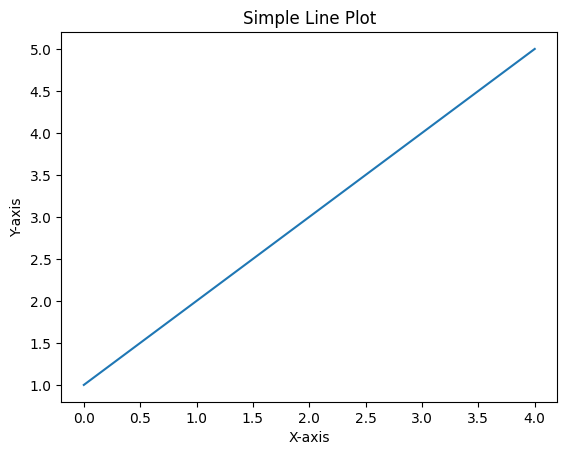

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Generate some data
data = [1, 2, 3, 4, 5]

# Create a plot
plt.plot(data)
plt.title("Simple Line Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()